In [1]:
#import all the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_auc_score



In [2]:
file_path=r'C:\Users\hp\Desktop\Thyroid-disease-detection\research\clustering-data.csv (1).xls'
df = pd.read_csv(file_path)

In [3]:
df.head(5)

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,...,tumor,hypopituitary,psych,TSH,T3,TT4,T4U,FTI,cluster,class
0,41.0,0,0,0,0,0,0,0,0,0,...,0,0,0,1.30,2.5,125.0,1.14,109.00,2,2
1,23.0,0,0,0,0,0,0,0,0,0,...,0,0,0,4.10,2.0,102.0,3.26,86.85,2,2
2,46.0,1,0,0,0,0,0,0,0,0,...,0,0,0,0.98,2.0,109.0,0.91,120.00,2,2
3,70.0,0,1,0,0,0,0,0,0,0,...,0,0,0,0.16,1.9,175.0,3.26,86.85,2,2
4,70.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0.72,1.2,61.0,0.87,70.00,2,2
5,18.0,0,1,0,0,0,0,0,0,0,...,0,0,0,0.03,2.0,183.0,1.30,141.00,0,2
6,59.0,0,0,0,0,0,0,0,0,0,...,0,0,0,4.12,2.0,72.0,0.92,78.00,2,2
7,80.0,0,0,0,0,0,0,0,0,0,...,0,0,0,2.20,0.6,80.0,0.70,115.00,2,2
8,66.0,0,0,0,0,0,0,0,0,0,...,1,0,0,0.60,2.2,123.0,0.93,132.00,2,2
9,68.0,1,0,0,0,0,0,0,0,0,...,0,0,0,2.40,1.6,83.0,0.89,93.00,2,2


In [4]:
x = df.drop(columns='class')
y=df['class']

In [5]:
#split each data clusters into test and train datasets
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

#x_train_1,x_test_1,y_train_1,y_test_1=train_test_split(x_1,y_1,test_size=0.2,random_state=42)
#x_train_2,x_test_2,y_train_2,y_test_2=train_test_split(x_2,y_2,test_size=0.2,random_state=42)


In [6]:
def evaluate_train_test_model(y_true,y_pred,y_pred_prob):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred, average='macro')  
    recall = recall_score(y_true, y_pred, average='macro')
    f1 = f1_score(y_true, y_pred, average='macro')
    roc_auc = roc_auc_score(y_true, y_pred_prob, multi_class='ovr')
    return accuracy,precision,recall,f1, roc_auc


def total_cost(y_test, y_pred_test):
    
    cm = confusion_matrix(y_test, y_pred_test)
    cost = 10 * (cm[0, 1] + cm[0, 2]) + 500 * (cm[1, 0] + cm[2, 0])
    return cost

## Now apply algorithms to cluster 0

c:\Users\hp\Desktop\Thyroid-disease-detection\venv\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Best Parameters for Logistic Regression: {'C': 0.1, 'max_iter': 100}


c:\Users\hp\Desktop\Thyroid-disease-detection\venv\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


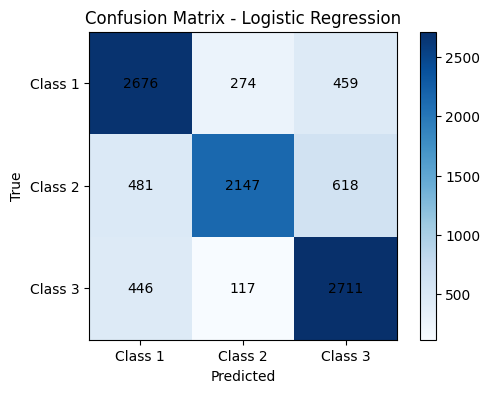

Evaluation metrics for Logistic Regression (Train):
Accuracy: 0.7573712703008939
Precision: 0.7652800262204257
Recall: 0.7575337988227617
F1-score: 0.7565164158580694
ROC-AUC Score: 0.8780318020145583
*******************
Evaluation metrics for Logistic Regression (Test):
Accuracy: 0.7587873904723537
Precision: 0.768112396411619
Recall: 0.7581498267882671
F1-score: 0.757808985046086
ROC-AUC Score: 0.8801543065490761
cost:470830
Best Parameters for Decision Tree: {'max_depth': 15, 'min_samples_leaf': 1, 'min_samples_split': 2}


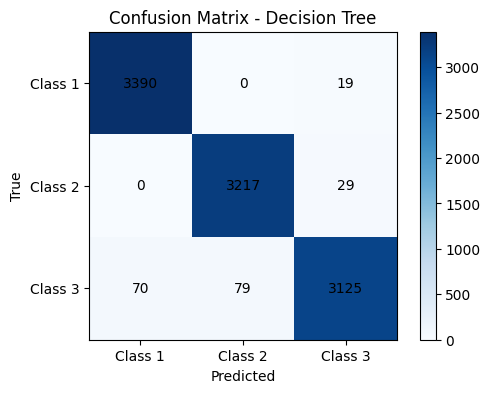

Evaluation metrics for Decision Tree (Train):
Accuracy: 0.98766209240841
Precision: 0.9878880614393889
Recall: 0.9876941651854191
F1-score: 0.9876269412932929
ROC-AUC Score: 0.9971328530247163
*******************
Evaluation metrics for Decision Tree (Test):
Accuracy: 0.9801591298217344
Precision: 0.9802242333557665
Recall: 0.9799941219740175
F1-score: 0.9799925588855002
ROC-AUC Score: 0.9886125932792199
cost:35190
Best Parameters for Random Forest: {'max_depth': 20, 'min_samples_split': 10, 'n_estimators': 100}


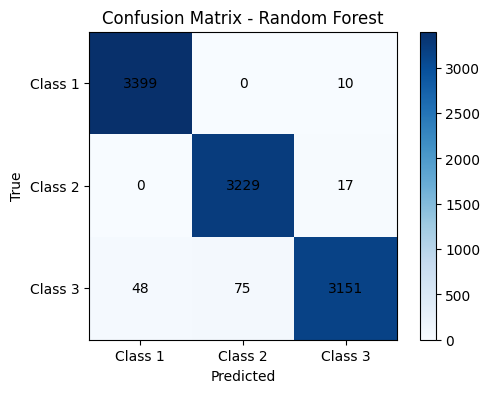

Evaluation metrics for Random Forest (Train):
Accuracy: 0.9887699861513282
Precision: 0.9889435419761078
Recall: 0.9887960512747468
F1-score: 0.9887593202273762
ROC-AUC Score: 0.9996515501982829
*******************
Evaluation metrics for Random Forest (Test):
Accuracy: 0.9848927384429449
Precision: 0.9849597268158102
Recall: 0.9847535500447294
F1-score: 0.9847486166996796
ROC-AUC Score: 0.9983059809156525
cost:24100


In [7]:

classifiers = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    #'SVM': SVC(),
    'KNN': KNeighborsClassifier(),
    'Naive Bayes': GaussianNB(),
    'XGBoost' : XGBClassifier(),
    'CatBoost' : CatBoostClassifier(),
    'Adaboost' : AdaBoostClassifier()}



for name, clf in classifiers.items():
    # Define hyperparameters for each classifier
    param_grid = {}
    if name == 'Logistic Regression':
        param_grid = {'C': [0.1, 1, 10],
        'max_iter': [100, 500, 1000]}

    elif name == 'Decision Tree':
        param_grid = {
        'max_depth': [None, 5, 10, 15],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]}

    elif name == 'Random Forest':
        param_grid = {
            'n_estimators': [100, 200, 300],
            'max_depth': [None, 10, 20],
            'min_samples_split': [2, 5, 10]}

    #elif name == 'SVM':
        #param_grid = {'C': [0.1,1,10], 'gamma': [0.1, 1, 10]}
        #pass

    elif name == 'KNN':
        param_grid = {'n_neighbors': [3, 5, 7]}

    elif name == 'Naive Bayes':
        pass  
    
    elif name == 'XGBoost':
        param_grid= {
            'n_estimators': [100, 200, 300],
            'max_depth': [3, 4, 5],
            'learning_rate': [0.01, 0.1, 0.2]
        }
    elif name == 'CatBoost':
        param_grid = {
            'iterations': [100, 200, 300],
            'depth': [4, 6, 8],
            'learning_rate': [0.01, 0.1, 0.2]
        }
    elif name == 'AdaBoost':
        param_grid= {
            'n_estimators': [50, 100, 200],
            'learning_rate': [0.01, 0.1, 1.0]}
        
        
    # Perform grid search to find the best parameters
    if param_grid:
        grid_search = GridSearchCV(estimator=clf, param_grid=param_grid, cv=5, n_jobs=-1)
        grid_search.fit(x_train, y_train)
        best_params = grid_search.best_params_
        print(f"Best Parameters for {name}: {best_params}")
        clf = clf.set_params(**best_params)
    clf.fit(x_train, y_train)
    
    # Predict on the test set and training_set
    y_pred_train= clf.predict(x_train)
    y_pred_test = clf.predict(x_test)

    y_pred_prob_train = clf.predict_proba(x_train)
    y_pred_prob_test  = clf.predict_proba(x_test)
    
    # Create confusion matrix
    conf_matrix = confusion_matrix(y_test, y_pred_test)

    # Plot confusion matrix
    plt.figure(figsize=(6, 4))
    plt.title(f'Confusion Matrix - {name}')
    plt.imshow(conf_matrix, cmap='Blues', interpolation='nearest')
    plt.colorbar()
    plt.xticks(np.arange(3), ['Class 1', 'Class 2', 'Class 3'])
    plt.yticks(np.arange(3), ['Class 1', 'Class 2', 'Class 3'])
    plt.xlabel('Predicted')
    plt.ylabel('True')
    for i in range(3):
        for j in range(3):
            plt.text(j, i, conf_matrix[i, j], ha='center', va='center', color='black')
    plt.show()

    accuracy_train,precision_train,recall_train,f1_train, roc_auc_train=evaluate_train_test_model(y_train,y_pred_train,y_pred_prob_train)
    accuracy_test,precision_test,recall_test,f1_test, roc_auc_test=evaluate_train_test_model(y_test,y_pred_test,y_pred_prob_test)

    cost_test=total_cost(y_test,y_pred_test)

    
    # Print metrics for training set
    print(f"Evaluation metrics for {name} (Train):")
    print(f"Accuracy: {accuracy_train}")
    print(f"Precision: {precision_train}")
    print(f"Recall: {recall_train}")
    print(f"F1-score: {f1_train}")
    print(f"ROC-AUC Score: {roc_auc_train}")

    print("*******************")

    # Print metrics for test set
    print(f"Evaluation metrics for {name} (Test):")
    print(f"Accuracy: {accuracy_test}")
    print(f"Precision: {precision_test}")
    print(f"Recall: {recall_test}")
    print(f"F1-score: {f1_test}")
    print(f"ROC-AUC Score: {roc_auc_test}")
    print(f"cost:{cost_test}")

   
